In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [2]:
url = 'https://lms-cdn.skillfactory.ru/assets/courseware/v1/0446d35f217801309147def00a120238/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/voice_gender.zip'
voice_data = pd.read_csv(url)
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
# типизация
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
# пропуски
voice_data.isnull().sum().sum()

0

In [7]:
X = voice_data.drop('label', axis=1)
y = voice_data.label
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


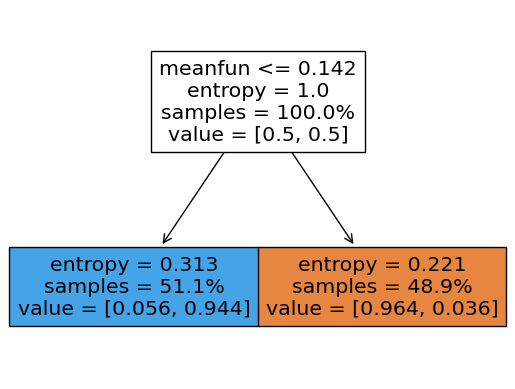

In [14]:
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    proportion=True
);

In [13]:
# Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке?
round(1223/2534*100, 1)

48.3

In [15]:
# Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке
y_pred = dt.predict(X_test)
print('Accuracy {:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy 0.956


In [ ]:
# Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке
y_pred = dt.predict(X_test)
print('Accuracy {:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy 0.956


**Задание 7.2**

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

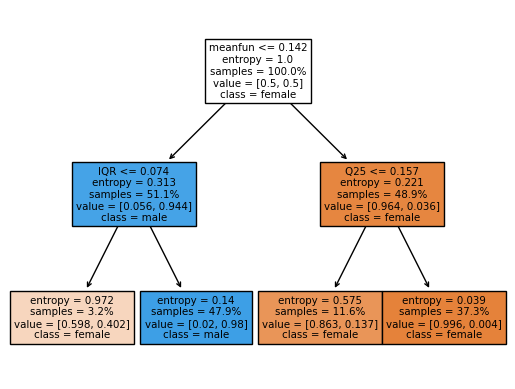

In [19]:
dt_7_2 = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt_7_2.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt_7_2, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    proportion=True,
    class_names=list(dt.classes_)
);

In [20]:
# Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке
y_pred_7_2 = dt_7_2.predict(X_test)
print('Accuracy {:.3f}'.format(metrics.accuracy_score(y_test, y_pred_7_2)))

Accuracy 0.962


**Задание 7.3**

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

In [24]:
dt_7_3 = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt_7_3.fit(X_train, y_train)

y_train_pred_7_3 = dt_7_3.predict(X_train)
y_test_pred_7_3 = dt_7_3.predict(X_test)
print(f'Глубина {dt_7_3.get_depth()}')
print(f'Количество листьев {dt_7_3.get_n_leaves()}')

print('Accuracy train {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred_7_3)))
print('Accuracy test {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred_7_3)))

Глубина 12
Количество листьев 54
Accuracy train 1.000
Accuracy test 0.973


**Задание 7.4**

Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

In [25]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

In [30]:
cv = model_selection.StratifiedKFold(n_splits=5)
grid_search_forest = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0), 
    param_grid=param_grid, 
    cv=cv, 
    n_jobs = -1
)  
grid_search_forest.fit(X_train, y_train)
best_params = grid_search_forest.best_params_
print("Наилучшие значения гиперпараметров: {}".format(best_params))

dt_best = tree.DecisionTreeClassifier(
            max_depth=best_params['max_depth'],
            criterion=best_params['criterion'],
            min_samples_split=best_params['min_samples_split'],
            random_state=0
)
dt_best.fit(X_train, y_train)
y_train_pred_7_4 = dt_best.predict(X_train)
y_test_pred_7_4 = dt_best.predict(X_test)
print('Accuracy train {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred_7_4)))
print('Accuracy test {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred_7_4)))

Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
Accuracy train 0.996
Accuracy test 0.970


**Задание 7.5**

Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.

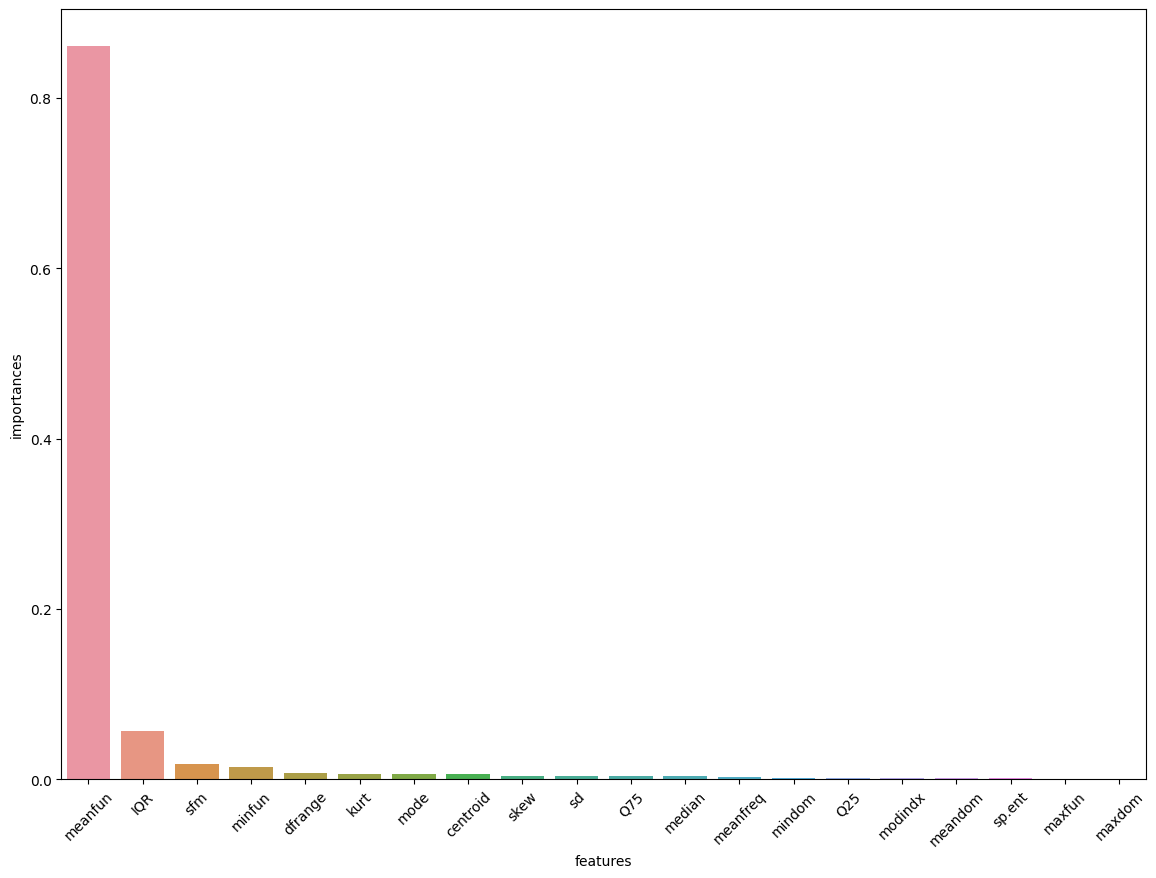

In [54]:
features = X.columns
feature_importances = dt_best.feature_importances_
imp = pd.DataFrame({'features': features, 'importances': feature_importances})
imp = imp.sort_values(by='importances', ascending=False)

plt.figure(figsize = (14, 10))
sns.barplot(data=imp,
            x='features',
            y='importances',
            # height=10
            # figsize=(13, 10),
            # title='Диаграмма важности факторов',
            # xlabel='Факторы',
            # ylabel='Важность'
            # log_scale=True
)
plt.xticks(rotation = 45);